In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os

#Aperture compression via linear interpolation implementation by Arseniy Koveshnikov from BIVT-18-3
#ITKN APD, NUST MISIS

#ВВОД ДАННЫХ
#считываем значения Y из файла, при этом X=0,1,2..N
base_path = "A:/hobby/vuz/miszki/aperture"
filename = "input2.txt"
path_to_file = os.path.join(base_path, filename)
with open(path_to_file , 'r') as inputfile:
    lines = [line.strip('\n') for line in inputfile]
    x = 0
    inputx = []
    inputy = []
    for i in lines:
        inputx.append(x)
        inputy.append(int(i))
        x += 1
#задаём значение апертуры
aperture = 1
#input(aperture)

Исходный массив точек:
X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Y: [10, 12, 14, 11, 12, 13, 25, 22, 19, 10, 9, 8, 7, 10, 13, 14]
Заданная апертура равна 1


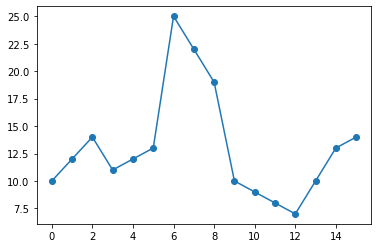

In [42]:
print("Исходный массив точек:")
print("X:", inputx)
print("Y:", inputy)
print("Заданная апертура равна", aperture)

#выводим точечный график исходной функции
plt.plot(inputx, inputy, marker='o')
plt.show()

Сжатый массив точек:
X: [0, 2, 3, 5, 6, 8, 9, 12, 14, 15]
Y: [10, 14, 11, 13, 25, 19, 10, 7, 13, 14]


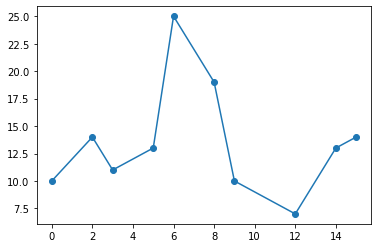

In [43]:
#СЖАТИЕ ДАННЫХ

#функция линейной интерполяции, поиск Y исходя из значений [X1, Y1] и [X2, Y2] через уравнение прямой
def interpolate(x, x1, x2, y1, y2):
    return (x - x2) / (x1 - x2) * (y1 - y2) + y2

#создаём массив для пометок выбрасываемых точек
marks = [False] * len(inputx)

#высчитываем
for i in range(len(inputx)-2):
    check_y = inputy[i+1]
    interpolated_y = interpolate(inputx[i+1], inputx[i], inputx[i+2], inputy[i], inputy[i+2])
    if (abs(check_y - interpolated_y) < aperture):
        marks[i+1] = True

#объявляем массивы для хранения сжатых данных
newx = []
newy = []
counter = 0

#в зависимости от маркировки точки вносим её в массив сжатых данных либо игнорируем
for i in marks:
    if (i == False):
        newx.append(inputx[counter])
        newy.append(inputy[counter])
    counter += 1

print("Сжатый массив точек:")
print("X:", newx)
print("Y:", newy)
#выводим график новой функции
plt.plot(newx, newy, marker='o')
plt.show()

Восстановленный массив точек:
X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Y: [10, 12.0, 14, 11, 12.0, 13, 25, 22.0, 19, 10, 9.0, 8.0, 7, 10.0, 13, 14]


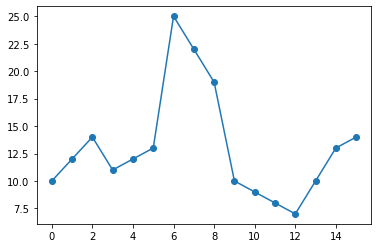

In [44]:
#ВОССТАНОВЛЕНИЕ ДАННЫХ

#объявляем массивы для хранения восстановленных данных
repairedx = []
repairedy = []

#здесь происходит восстановление точек через линейную интерполяцию
#необходимость добавления промежуточных точек выясняется через проверку расстояния по X между имеющимися точками
counter = 0
for i in range(len(newx) - 1):
    repairedx.append(newx[i])
    repairedy.append(newy[i])
    if (newx[i+1] - newx[i] > 1):
        counter += 1
        for n in range(newx[i+1] - newx[i] - 1):
            x_int = newx[i] + n + 1
            repairedx.append(x_int)
            repairedy.append(interpolate(x_int, newx[i], newx[i + 1], newy[i], newy[i + 1]))
repairedx.append(newx[len(newx) - 1])
repairedy.append(newy[len(newx) - 1])

#выводим восстановленный график функции
print("Восстановленный массив точек:")
print("X:", repairedx)
print("Y:", repairedy)
plt.plot(repairedx, repairedy, marker='o')
plt.show()